***Vorlesung 'Syntax natürlicher Sprachen'***

--- 
# Anwendungsbeispiel: Syntaktische Modelle Stanford Parser

---

### Stanford Parser
Das Stanford-CoreNLP-Paket beinhaltet (neben Modulen wie POS-tagger, NER, IE, coreference resolution) verschiedene Parser (insbesondere Dependenzparsing) und unterstützt viele verschiedene Sprachen. Das englische Modell ist im CoreNLP-Paket enthalten, Modelle für die anderen Sprachen können separat heruntergeladen werden.

Die Java-basierten Parser und Modelle der Stanford-NLP-Tools können über das entsprechende NLTK-Interface verwendet werden.

---

Für weitere Informationen siehe:

https://nlp.stanford.edu/software/lex-parser.shtml

http://www.nltk.org/_modules/nltk/parse/stanford.html


Den Stanford Parser gibt es auch als Webservice (inkl. Visualisierung):

http://nlp.stanford.edu:8080/parser/

http://nlp.stanford.edu:8080/corenlp/process


---

### (Installation)

#### Des Stanford Parser wird in der Veranstaltung ausschließlich zu Demonstrationszwecken eingesetzt. Eine Installation ist für die Bearbeitung der Übungsblätter nicht notwendig!

Downloaden Sie unter folgenden Links die Dateien `stanford-corenlp-full-2018-10-05.zip` sowie `stanford-german-corenlp-2018-10-05-models.jar` (Version 3.9.2):

- Stanford CoreNLP: https://stanfordnlp.github.io/CoreNLP/download.html
- Stanford german model: https://stanfordnlp.github.io/CoreNLP/download.html

Entpacken Sie die zip-Datei und merken Sie sich gut den Pfad des extrahierten Ordners sowie des deutschen Modells.


---

Installieren Sie die aktuellste Java-Version (1.8 ist Voraussetzung für den Stanford Parser; Mac: Java 8 JDK).

- Java 1.8: installieren/Version überprüfen: ``java -version``

Sie müssen evtl. die Umgebungsvariable `JAVAHOME` anpassen.


---

Setzen Sie dann die korrekten Pfade:

`PATH_TO_CORE` : Pfad zum CoreNLP

`PATH_TO_GER_MODEL` : Pfad zum deutschen Modell

Verwenden Sie am besten voll ausgeschriebene absolute Pfade.

---
# Stanford Parser (`englishPCFG`)

In [1]:
import nltk
from nltk.parse.stanford import StanfordParser
import os

PATH_TO_CORE = os.path.join(os.getenv("HOME"), "nltk_data", "stanford-corenlp-full-2018-10-05")
PATH_TO_GERMAN_MODEL = os.path.join(os.getenv("HOME"), "nltk_data", "stanford-models-2018-10-05")

jar = os.path.join(PATH_TO_CORE, "stanford-corenlp-3.9.2.jar")
model = os.path.join(PATH_TO_GERMAN_MODEL, "stanford-german-corenlp-2018-10-05-models.jar")

In [2]:
sent = 'I shot an elephant in my pajamas'

In [3]:
parser=StanfordParser(jar,model,model_path="edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz")

tree_list = list(parser.raw_parse(sent)) 
tree_list[0].pretty_print(unicodelines=True)


    ROOT                                      
     │                                         
     S                                        
 ┌───┴──────────────┐                          
 │                  VP                        
 │   ┌────────┬─────┴──────────┐               
 │   │        │                PP             
 │   │        │            ┌───┴────┐          
 NP  │        NP           │        NP        
 │   │    ┌───┴─────┐      │   ┌────┴─────┐    
PRP VBD   DT        NN     IN PRP$       NNS  
 │   │    │         │      │   │          │    
 I  shot  an     elephant  in  my      pajamas



---
# Stanford Dependency Parser

In [4]:
from nltk.parse.stanford import StanfordDependencyParser

dep_parser = StanfordDependencyParser(
    jar, model,
    model_path="edu/stanford/nlp/models/lexparser/" + 
    "englishPCFG.ser.gz"
)

In [5]:
sent = 'I shot an elephant in my pajamas'

In [6]:
result = dep_parser.raw_parse(sent)
for depparse in result:
    print(depparse.to_dot())

digraph G{
edge [dir=forward]
node [shape=plaintext]

0 [label="0 (None)"]
0 -> 2 [label="root"]
1 [label="1 (I)"]
2 [label="2 (shot)"]
2 -> 1 [label="nsubj"]
2 -> 4 [label="dobj"]
2 -> 7 [label="nmod"]
3 [label="3 (an)"]
4 [label="4 (elephant)"]
4 -> 3 [label="det"]
5 [label="5 (in)"]
6 [label="6 (my)"]
7 [label="7 (pajamas)"]
7 -> 5 [label="case"]
7 -> 6 [label="nmod:poss"]
}


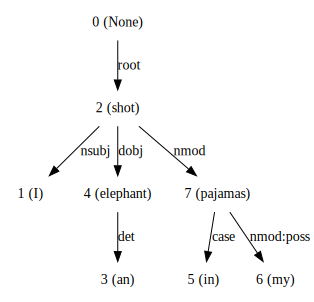

In [7]:
depparse

---
# Stanford Parser (`germanPCFG`)

In [8]:
sent = 'Der Junge sah das Mädchen mit dem Fernglas'

In [9]:
parser = StanfordParser(jar, model,model_path="edu/stanford/nlp/models/lexparser/germanPCFG.ser.gz")

tree_list = list(parser.raw_parse(sent)) 
tree_list[0].pretty_print(unicodelines=True)

                    ROOT                              
                     │                                 
                    NUR                               
                     │                                 
                     S                                
     ┌──────────┬────┴────┬────────────────┐           
     NP         │         NP               PP         
 ┌───┴────┐     │    ┌────┴─────┐     ┌────┼─────┐     
ART       NN  VVFIN ART         NN   APPR ART    NN   
 │        │     │    │          │     │    │     │     
Der     Junge  sah  das      Mädchen mit  dem Fernglas



In [10]:
sent = 'Der Junge sah das Mädchen ohne Fernglas'

In [11]:
parser = StanfordParser(jar, model,model_path="edu/stanford/nlp/models/lexparser/germanPCFG.ser.gz")

tree_list = list(parser.raw_parse(sent)) 
tree_list[0].pretty_print(unicodelines=True)


                    ROOT                          
                     │                             
                    NUR                           
                     │                             
                     S                            
     ┌──────────┬────┴──────┐                      
     │          │           NP                    
     │          │    ┌──────┼──────────┐           
     NP         │    │      │          PP         
 ┌───┴────┐     │    │      │     ┌────┴─────┐     
ART       NN  VVFIN ART     NN   APPR        NE   
 │        │     │    │      │     │          │     
Der     Junge  sah  das  Mädchen ohne     Fernglas

